# Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kernels import Gaussian, Epanechnikov
from kde import KernelDensityEstimate

# Kernel Density Estimation

## Test kernel class

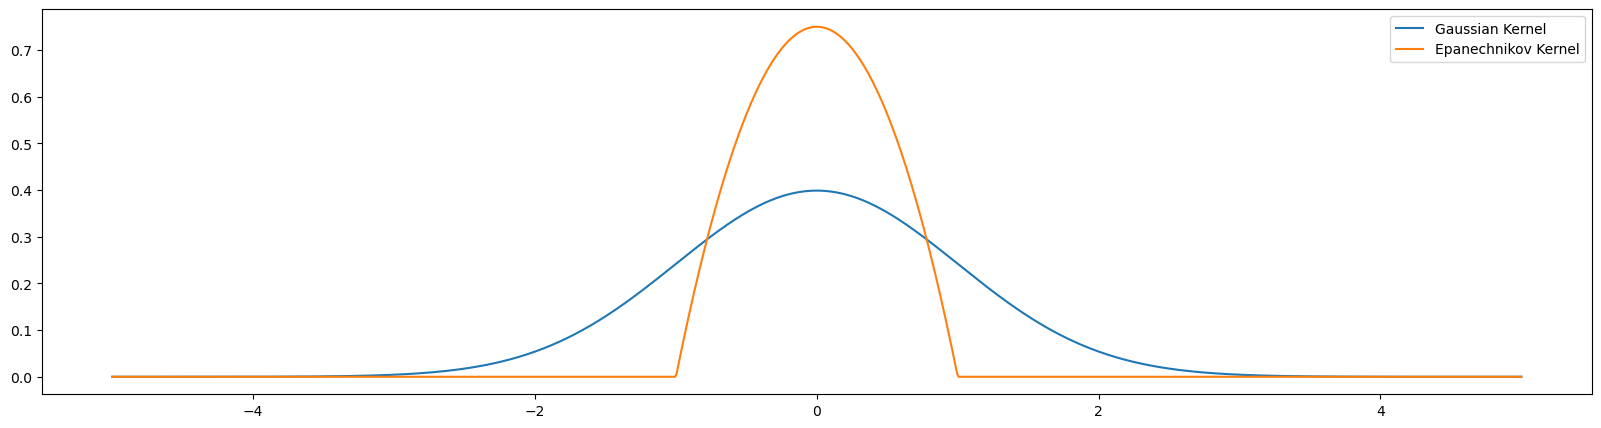

In [2]:
gaussian = Gaussian()
epanechnikov = Epanechnikov()

x = np.linspace(-5, 5, 1000)
plt.figure(figsize = (20, 5))
plt.plot(x, gaussian(x), label = 'Gaussian Kernel')
plt.plot(x, epanechnikov(x), label = 'Epanechnikov Kernel')
plt.legend()
plt.show()

# Generate data

## Gaussian

In [61]:
def gaussian_pdf(x, mu, sig):
    """Univariate Gaussian probability density function"""
    return np.exp( - ( x - mu )**2 / ( 2 * sig**2 ) ) * ( 1 / np.sqrt( 2 * np.pi * sig**2) )

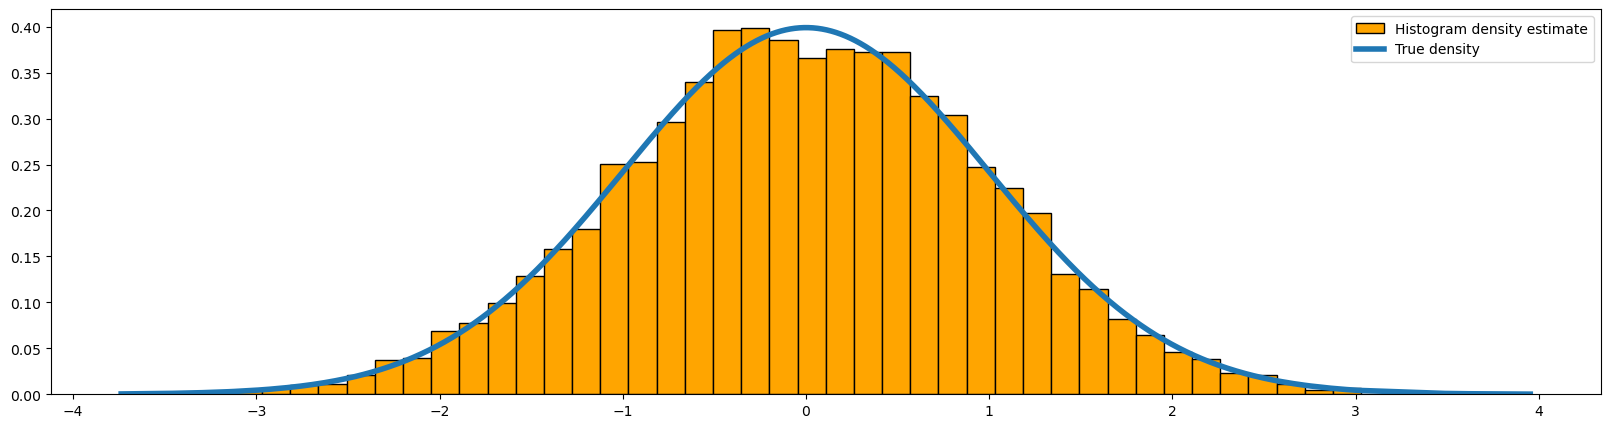

In [62]:
# Data generation
N = 10000
X = np.random.normal(0, 1, N).reshape(-1, 1)
pdf = gaussian_pdf(X, 0, 1)

plt.figure(figsize = (20, 5))
plt.hist(X, color = 'orange', ec = 'black', bins = 50, density = True, label = 'Histogram density estimate')
plt.plot(X[np.argsort(X, axis = 0)[:, 0]], pdf[np.argsort(X, axis = 0)[:, 0]], linewidth = 4,  label = 'True density')
plt.legend()
plt.show()

## Gaussian Mixture Model

In [47]:
def guassian_mixture_pdf(x, weights, mus, sds):
    """Gaussian mixture probability density function"""
    assert np.isclose(weights.sum(), 1), 'The mixture weights must sum to 1'
    assert weights.shape == mus.shape == sds.shape, 'The number of weights, means and standard deviations must be equal'
    
    val = 0
    for i in range(weights.shape[0]):
        val += weights[i] * gaussian_pdf(x, mus[i], sds[i])
        
    return val

def gaussian_mixture_gen(weights, mus, sds, n):
    """Generate n points from the Gaussian mixture model defined by weights, mus and sds"""
    assert np.isclose(weights.sum(), 1), 'The mixture weights must sum to 1'
    assert weights.shape == mus.shape == sds.shape, 'The number of weights, means and standard deviations must be equal'
    
    draws = np.random.choice(weights, n, p = weights) # Draw samples accoridng to mixture weight probabilities
    for i in range(weights.shape[0]):
        if i == 0:
            # Initialise array for first iteration
            X = np.random.normal(mus[i], sds[i], (draws == weights[i]).sum() ).reshape(-1, 1)
        else:
            # V stack the incoming arrays
            X = np.vstack( ( X, np.random.normal(mus[i], sds[i], (draws == weights[i]).sum() ).reshape(-1, 1) ) )
    return X

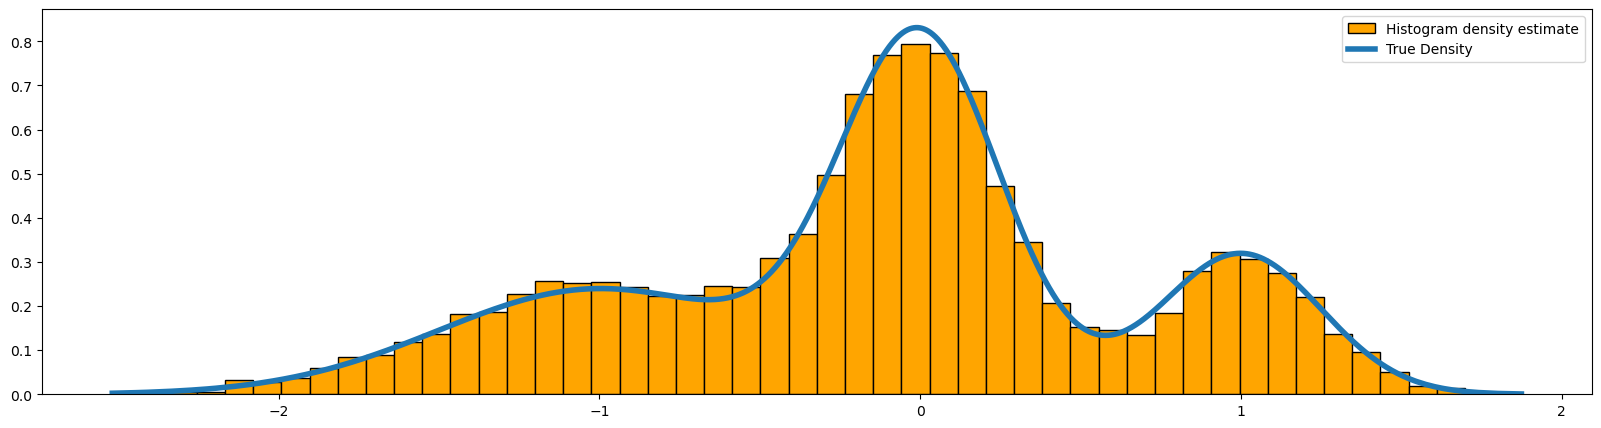

In [68]:
# Model specification
weights = np.array([0.5, 0.3, 0.2])
mus = np.array([0, -1, 1])
sds = np.array([0.25, 0.5, 0.25])

# Data generation
n = 10000
X = gaussian_mixture_gen(weights, mus, sds, n)
pdf = guassian_mixture_pdf(X, weights, mus, sds)

# Draw density here
plt.figure(figsize = (20, 5))
plt.hist(X, color = 'orange', ec = 'black', bins = 50, density = True, label = 'Histogram density estimate')
plt.plot(X[np.argsort(X, axis = 0)[:, 0]], pdf[np.argsort(X, axis = 0)[:, 0]], linewidth = 4,  label = 'True Density')
plt.legend()
plt.show()

## Set up KDE

In [81]:
# Try both kernels
gaussian = Gaussian() 
epanechnikov = Epanechnikov()

# Initialise kde classes
gaussian_kde = KernelDensityEstimate(X, gaussian)
epanechnikov_kde = KernelDensityEstimate(X, epanechnikov)

# Silverman's bandwidth rule
gaussian_kde.silverman()
epanechnikov_kde.silverman()
#kde.set_bandwidth(0.125)

Silverman's rule of thumb: h = 0.1115
Silverman's rule of thumb: h = 0.1115


## Evaluate KDE

In [82]:
# anchored 
M = 10000
x = np.linspace(-2.5, 2, M).reshape(-1, 1)
gaussian_kde_vals = gaussian_kde(x)
epanechnikov_kde_vals = epanechnikov_kde(x)

## Plot results

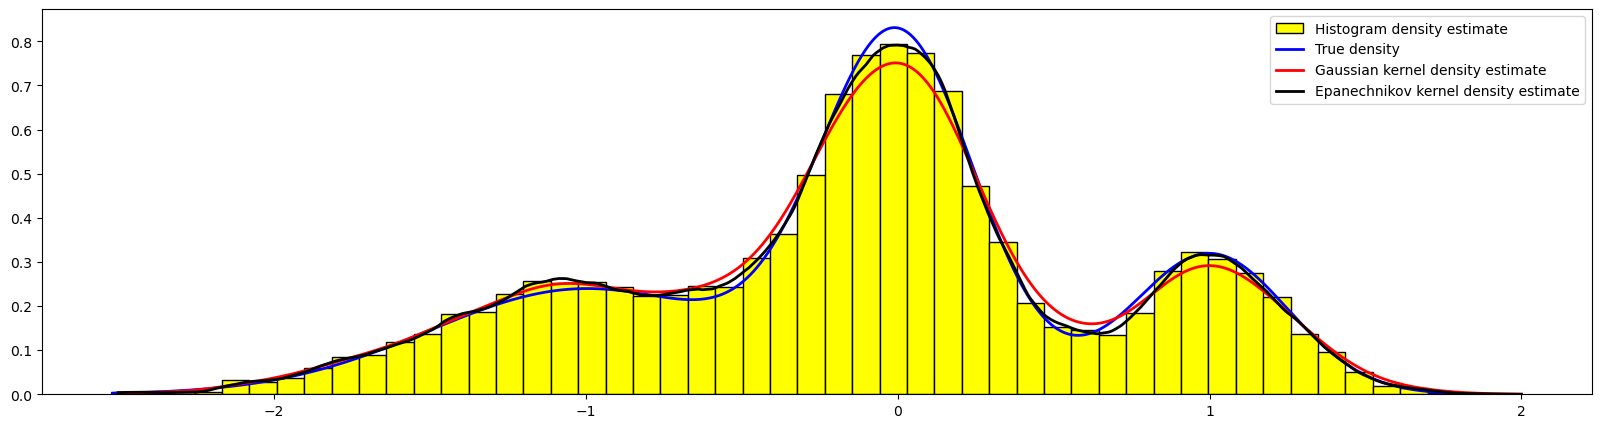

In [88]:
plt.figure(figsize = (20, 5))

plt.hist(X, color = 'yellow', ec = 'black', bins = 50, density = True, label = 'Histogram density estimate')

plt.plot(X[np.argsort(X, axis = 0)[:, 0]], pdf[np.argsort(X, axis = 0)[:, 0]], linewidth = 2,  label = 'True density', color = 'blue')
plt.plot(x, gaussian_kde_vals, color = 'red', linewidth = 2, label = 'Gaussian kernel density estimate')
plt.plot(x, epanechnikov_kde_vals, color = 'black', linewidth = 2, label = 'Epanechnikov kernel density estimate')

plt.legend()
plt.show()